In [1]:
import cv2 
import numpy as np 

In [2]:
import os
import matplotlib.pyplot as plt
import skimage as ski
from skimage import io
from skimage.color import rgb2gray

In [3]:
from typing import Optional, Tuple, Union, TypeVar, List
import numpy.typing as npt

In [4]:
from scipy.ndimage.filters import convolve

In [5]:
os.getcwd()

'C:\\Users\\rzamb\\Documents\\UMD\\640_Computer_Vision\\HW\\hw2\\Zambrano_Ricardo_ASN2_py'

**I took the opportunity of having short answer problem 2 to test if OpenCV would have the same output I had following the method taught in class. It did.** This is just me being curious and checking how theory connects with practice.

In [6]:
kernel = np.ones((1, 3), np.uint8) 
kernel

array([[1, 1, 1]], dtype=uint8)

In [7]:
kernel.shape

(1, 3)

In [8]:
img = np.array([[0,0,1,1,0,0,1,1]], dtype=np.uint8)
img

array([[0, 0, 1, 1, 0, 0, 1, 1]], dtype=uint8)

In [9]:
img.shape

(1, 8)

In [10]:
img_dilation = cv2.dilate(img, kernel, iterations=1) 
img_dilation

array([[0, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

### Problem 2

Loading the image

In [11]:
PATH_TOTORO = '..\Zambrano_Ricardo_ASN2_py\input_img_totoro.jpg'
PATH_CARACAS = '..\Zambrano_Ricardo_ASN2_py\input_img_caracas.jpg'        

In [12]:
# Loading the image
totoro = io.imread(PATH_TOTORO)
ccs = io.imread(PATH_CARACAS)

In [13]:
# Checking the type of the image matches the required dtype
totoro.dtype

dtype('uint8')

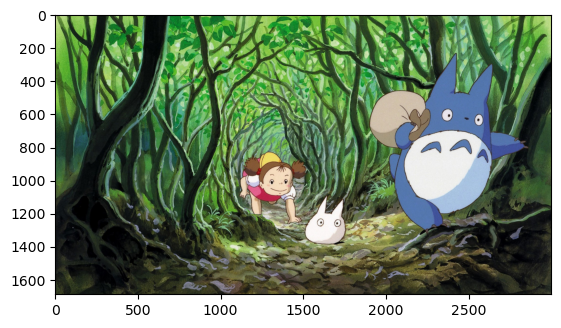

In [14]:
# Showing image used for the excercise
plt.imshow(totoro)
plt.show()

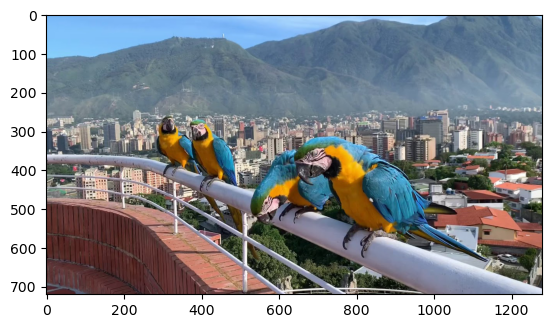

In [15]:
# Showing image used for the excercise
plt.imshow(ccs)
plt.show()

**Writing energy_image()**

The energy function is given by:

$$
e_{1}(I) = |\frac{\delta}{\delta x}I| + |\frac{\delta}{\delta x}|
$$

The image above has three channels. Thereby we need to build a derivative filter that will sweep each channel. For the derivative in each direction I will use the Scharr operator, which is more accurate than the Sobel operator.

In [16]:
# 2D version of the Scharr operator

filter_dy = np.array([
    [47.0, 162.0, 47.0],
    [0.0, 0.0, 0.0],
    [-47.0, -162.0, -47.0],
])

# This converts it from a 2D filter to a 3D filter, replicating the same filter for each channel: R, G, B
filter_dy = np.stack((filter_dy,filter_dy,filter_dy), axis=2)

filter_dy

array([[[  47.,   47.,   47.],
        [ 162.,  162.,  162.],
        [  47.,   47.,   47.]],

       [[   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]],

       [[ -47.,  -47.,  -47.],
        [-162., -162., -162.],
        [ -47.,  -47.,  -47.]]])

In [17]:
filter_dy[:,:,0]

array([[  47.,  162.,   47.],
       [   0.,    0.,    0.],
       [ -47., -162.,  -47.]])

In [18]:
# 2D version of the Scharr operator

filter_dx = np.array([
    [47.0, 0.0, -47.0],
    [162.0, 0.0, -162.0],
    [47.0, 0.0, -47.0],
])

# This converts it from a 2D filter to a 3D filter, replicating the same filter for each channel: R, G, B
filter_dx = np.stack((filter_dx,filter_dx,filter_dx), axis=2)

filter_dx

array([[[  47.,   47.,   47.],
        [   0.,    0.,    0.],
        [ -47.,  -47.,  -47.]],

       [[ 162.,  162.,  162.],
        [   0.,    0.,    0.],
        [-162., -162., -162.]],

       [[  47.,   47.,   47.],
        [   0.,    0.,    0.],
        [ -47.,  -47.,  -47.]]])

In [19]:
filter_dx[:,:,2]

array([[  47.,    0.,  -47.],
       [ 162.,    0., -162.],
       [  47.,    0.,  -47.]])

To convolve the image I am using a scypy function: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html

In [20]:
img = totoro.astype(np.double)
img.dtype

dtype('float64')

In [21]:
convolved_img = np.absolute(convolve(img, filter_dx)) + np.absolute(convolve(img, filter_dy))

# We sum the energies in the red, green, and blue channels
energy_map = convolved_img.sum(axis=2)

In [22]:
totoro.shape

(1688, 3000, 3)

In [23]:
energy_map.shape

(1688, 3000)

In [24]:
# Checking the output type meets HW's requirement
energy_map.dtype

dtype('float64')

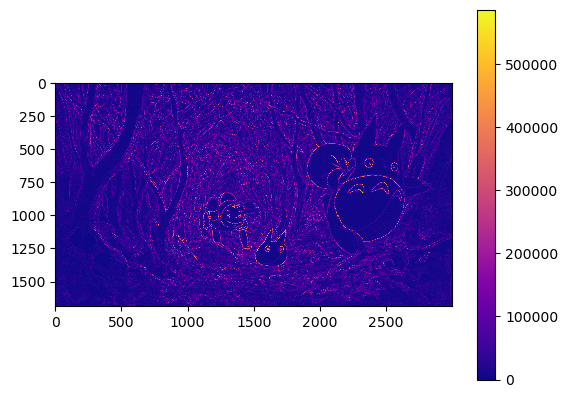

In [25]:
plt.imshow(energy_map, cmap='plasma', interpolation='none')
plt.colorbar()
plt.show()

In [26]:
input_type = np.dtype(np.uint8)
output_type = np.dtype(np.double)

def energy_image(im: npt.NDArray[np.uint8]) -> npt.NDArray[np.double]:
    """
    Input Arguments: 
        An image with dimmensions MxNx3 of data type uint8
    
    Output: 
        The result of passing the image to the energy function e_1(im) = |d(im)/dx| + |d(im)/dy|
        The partial derivatives operators use the optimal 8 bit integer valued 3x3 filter 
        stemming from Scharr's theory
    """
    assert im.shape[2] == 3, 'Unexpected number of channels. Pass an image with 3 channels.'
    assert im.dtype == np.uint8, 'Unexpedted dtype. The function expects an RBG image of data type uint8.'
    
    ### Creating Partial Derivative Operators ###
    
    # 2D version of the Scharr operator
    filter_dy = np.array([
        [47.0, 162.0, 47.0],
        [0.0, 0.0, 0.0],
        [-47.0, -162.0, -47.0],
    ])

    # This converts it from a 2D filter to a 3D filter, replicating the same filter for each channel: R, G, B
    filter_dy = np.stack((filter_dy,filter_dy,filter_dy), axis=2)
    
    # 2D version of the Scharr operator
    filter_dx = np.array([
        [47.0, 0.0, -47.0],
        [162.0, 0.0, -162.0],
        [47.0, 0.0, -47.0],
    ])

    # This converts it from a 2D filter to a 3D filter, replicating the same filter for each channel: R, G, B
    filter_dx = np.stack((filter_dx,filter_dx,filter_dx), axis=2)

    ### Converting input into desired output data type ###
    img = im.astype(np.double)
    
    # Convolving the image to get the gradient on each channel
    convolved_img = np.absolute(convolve(img, filter_dx)) + np.absolute(convolve(img, filter_dy))

    # Adding the energies in the red, green, and blue channels
    energy_map = convolved_img.sum(axis=2)
    
    return energy_map

In [27]:
test_energy_map = energy_image(totoro)

In [28]:
test_energy_map

array([[ 2304., 26802., 14436., ..., 10188., 15308.,  8960.],
       [  846., 22428., 14436., ...,  8730., 13286., 11364.],
       [ 4608., 12132.,  7854., ...,  8370.,  8526.,  7680.],
       ...,
       [12978., 15282., 13824., ..., 35784., 35784., 22428.],
       [17586., 14436., 10062., ..., 10296., 10908., 23652.],
       [10674., 11286.,  1458., ...,  8370.,  9828.,  7524.]])

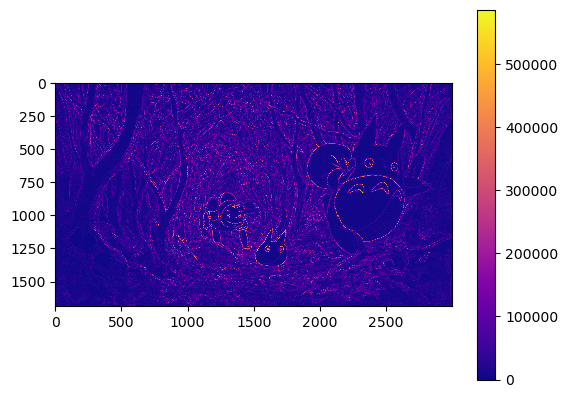

In [29]:
plt.imshow(test_energy_map, cmap='plasma', interpolation='none')
plt.colorbar()
plt.show()

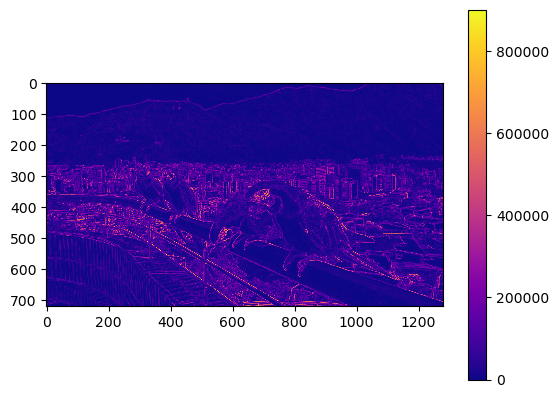

In [30]:
test_energy_map_2 = energy_image(ccs)
plt.imshow(test_energy_map_2, cmap='plasma', interpolation='none')
plt.colorbar()
plt.show()

**Writing cumulative_minimum_energy_map()**

Using dynamic programming for generating a vertical seam the first step is to traverse the image from the second row to the last row and compute the cumulative minimum energy M for all possible connected seams for each pixel (i,j):

$$
M(i,j) = e(i,j) + min[M(i-1,j-1), M(i-1,j), M(i+1,j+1)]
$$

In [31]:
cumulative_energy_map = np.zeros_like(test_energy_map)

In [32]:
test_energy_map.shape

(1688, 3000)

In [33]:
cumulative_energy_map.shape

(1688, 3000)

In [34]:
row_size = test_energy_map.shape[0]
cols_size = test_energy_map.shape[1]

In [35]:
def cumulative_minimum_energy_map(energy_map: npt.NDArray[np.double],seam_direction: int=0) -> npt.NDArray[np.double]:
    """
    Computes the cumulative minimum energy map using dyamic programming as formulated by Avidan and Shamir in
    'Seam Carving for Content-Aware Image Resizing'
    source: http://graphics.cs.cmu.edu/courses/15-463/2012_fall/hw/proj3-seamcarving/imret.pdf
    
    Input:
        A single-channel image with the result of the energy function, expected format is a numpy array
        of data type double (float64)
        An integer indicating the direction of the desired seam. 0 traverses the image's rows
        and calculates a vertical seam. 1 traverses the image's columns and calculates an horizontal seam 
    Output:
        A 2D numpy array representing the minimum energy map. A numpy array of data type double (float64)
    
    Parameters
    ----------
    energy_map : np.ndarray [shape=(M,N)]
    direction : int

    Returns
    ----------
    cumulative_energy_map : np.ndarray [shape=(M,N)]

    Examples
    ----------
    >>> cumulative_minimum_energy_map(energy_map,0)
    >>>
    """
    assert len(energy_map.shape) == 2, 'Unexpected number of dimensions. Expecting a 2d numpy array.'
    assert energy_map.dtype == np.double, 'Unexpedted dtype. The function expects a 2D energy map of data type double(float64).'
    assert seam_direction in [0,1], 'ValueError: specify a valid direction for the seam.\n==> 0 for a verical seam\n==> 1 for a horizontal seam'
    
    cumulative_energy_map = np.zeros_like(energy_map)
    row_size = energy_map.shape[0]
    cols_size = energy_map.shape[1]
    
    if seam_direction == 0:
        
        # Setting the first row of the output equal to the first row of the energy map
        cumulative_energy_map[0,:] = energy_map[0,:]
        
        # Traversing the energy map across rows
        for i in range(1,row_size):
            for j in range(0,cols_size):
                if j == 0:
                    cumulative_energy_map[i,j] = energy_map[i,j] + min(energy_map[i-1,j],energy_map[i-1,j+1])
                elif j == (cols_size - 1):
                    cumulative_energy_map[i,j] = energy_map[i,j] + min(energy_map[i-1,j-1],energy_map[i-1,j])
                else:
                    cumulative_energy_map[i,j] = energy_map[i,j] + min(energy_map[i-1,j-1],energy_map[i-1,j],energy_map[i-1,j+1])
        
    if seam_direction == 1:
        
        # Setting the first column of the output equal to the first rcolumn of the energy map
        cumulative_energy_map[:,0] = energy_map[:,0]
        
        # Traversing the energy map across colums
        for j in range(1,cols_size):
            for i in range(0,row_size):
                if i == 0:
                    cumulative_energy_map[i,j] = energy_map[i,j] + min(energy_map[i,j-1],energy_map[i+1,j-1])
                elif i == (row_size - 1):
                    cumulative_energy_map[i,j] = energy_map[i,j] + min(energy_map[i,j-1],energy_map[i-1,j-1])
                else:
                    cumulative_energy_map[i,j] = energy_map[i,j] + min(energy_map[i-1,j-1],energy_map[i,j-1],energy_map[i+1,j-1])
    
    return cumulative_energy_map

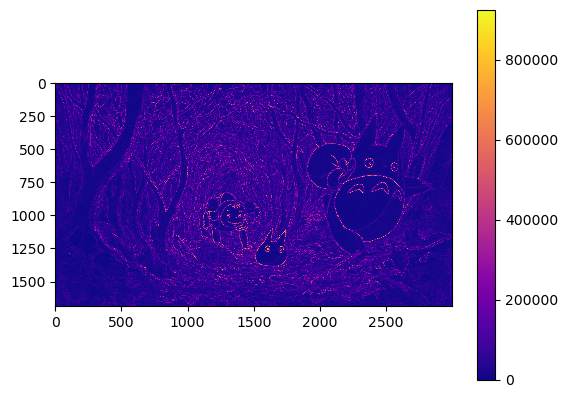

In [36]:
test_cumulative_energy_map_0 = cumulative_minimum_energy_map(test_energy_map,0)
plt.imshow(test_cumulative_energy_map_0, cmap='plasma', interpolation='none')
plt.colorbar()
plt.show()

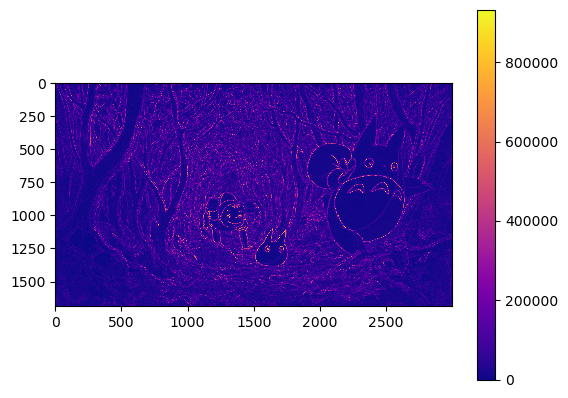

In [37]:
test_cumulative_energy_map_1 = cumulative_minimum_energy_map(test_energy_map,1)
plt.imshow(test_cumulative_energy_map_1, cmap='plasma', interpolation='none')
plt.colorbar()
plt.show()

In [38]:
test_cumulative_energy_map_0

array([[ 2304., 26802., 14436., ..., 10188., 15308.,  8960.],
       [ 3150., 24732., 26802., ..., 10548., 22246., 20324.],
       [ 5454., 12978., 22290., ..., 11646., 17256., 19044.],
       ...,
       [25956., 28260., 25548., ..., 81786., 81786., 75342.],
       [30564., 27414., 23458., ..., 46080., 33336., 46080.],
       [25110., 21348., 11520., ..., 18666., 20124., 18432.]])

In [39]:
test_cumulative_energy_map_1

array([[ 2304., 27648., 36864., ..., 12006., 24038., 22246.],
       [  846., 23274., 26568., ..., 10548., 21656., 19890.],
       [ 4608., 12978., 15534., ..., 11646., 16896., 16206.],
       ...,
       [12978., 28260., 28260., ..., 50688., 46080., 33336.],
       [17586., 25110., 21348., ..., 14058., 19278., 33480.],
       [10674., 21960., 12744., ..., 12132., 18198., 17352.]])

In [40]:
test_energy_map

array([[ 2304., 26802., 14436., ..., 10188., 15308.,  8960.],
       [  846., 22428., 14436., ...,  8730., 13286., 11364.],
       [ 4608., 12132.,  7854., ...,  8370.,  8526.,  7680.],
       ...,
       [12978., 15282., 13824., ..., 35784., 35784., 22428.],
       [17586., 14436., 10062., ..., 10296., 10908., 23652.],
       [10674., 11286.,  1458., ...,  8370.,  9828.,  7524.]])

**Writing find_optimal_vertical_seam()**

At the end of the process of finding the cumulative minimum energy map, the minimum value of the **last row** in the map will **indicate the end of the minimal connected vertical seam**. Hence, in the second step we backtrack from this minimum entry on the map to find the path of the optimal seam

In [41]:
np.argmin(np.array([1,2,3,0,5,6,7]))

3

In [42]:
a = np.arange(12).reshape(4,3)
a[1,1] = 0
a[2,2] = 0
a

array([[ 0,  1,  2],
       [ 3,  0,  5],
       [ 6,  7,  0],
       [ 9, 10, 11]])

In [43]:
np.argmin(a, axis=1)

array([0, 1, 2, 0], dtype=int64)

In [81]:
def find_optimal_vertical_seam(cum_energy_map: npt.NDArray[np.double]) -> npt.NDArray[np.double]:
    """
    Find the optimal vertical seam in a 2D array representing the cumulative minimum energy map
    
    Input:
        A single-channel cumulative minimum energy map of an image, expected format is a numpy array
        of data type double (float64)
    Output:
        A 1D numpy array containing the column indices of the pixels from the seam in each row.
        The selected pixels  minimum energy map. A numpy array of data type double (float64)
    
    Parameters
    ----------
    cum_energy_map : np.ndarray [shape=(M,N)]

    Returns
    ----------
    vertical_seam : np.ndarray [shape=(M,)]

    Examples
    ----------
    >>> find_optimal_vertical_seam_1(cum_energy_map)
    >>>
    """
    assert len(cum_energy_map.shape) == 2, 'Unexpected number of dimensions. Expecting a 2d numpy array.'
    assert cum_energy_map.dtype == np.double, 'Unexpedted dtype. The function expects a 2D energy map of data type double(float64).'
    
    row_size, cols_size = cum_energy_map.shape
    
    # First look to the minimum value at the last row, the end of the seam
    first_minVal_indx = np.argmin(cum_energy_map[row_size-1,:])
    
    # Record the value of the first occurence of the minimum value
    first_minVal = cum_energy_map[row_size-1,first_minVal_indx]
    
    # Checking if the value occurs in other places in the last row
    occurences_minVal = np.count_nonzero(cum_energy_map[row_size-1,:] == first_minVal)

    # Checking if the minimumvalue is unique or not
    unique_minVal = not bool(occurences_minVal-1)
    
    if unique_minVal:
        
        # Create a vector to store the column indexes of the seam
        vertical_seam = np.zeros((row_size,),dtype=np.double)
        
        # Assigning column index value of the pixel with the minVal in the last row of the 
        # cumulative energy map to the seam-vector 
        vertical_seam[row_size-1] = first_minVal_indx
        
        # Filling the column indexes in the vector
        for i in range(row_size-2, -1, -1):
            upleft = int(vertical_seam[i+1]-1)
            upright = int(vertical_seam[i+1]+2)
            vertical_seam[i] = vertical_seam[i+1] + np.argmin(cum_energy_map[i,upleft:upright]) - 1
    
    else:
        
        # Create a matrix to store the potential vectors in the columns. Each candidate vector column
        # stores the indexes of the candidate seam
        vertical_seam_matrix = np.zeros((row_size,occurences_minVal),dtype=np.double)
        
        # Finding column indexes of all cuurences of the min value
        index_list = np.where(cum_energy_map[row_size-1,:] == first_minVal)[0]
        
        # Assigning the column index values of the pixels with the minimun values 
        # in the last row cumulative energy map to the seam-vector matrix
        for j in range(vertical_seam_matrix.shape[1]):
            vertical_seam_matrix[row_size-1,j] = index_list[j]
        
        # Filling the matrix with column index values of each seam candidate
        for i in range(row_size-2, -1, -1):
            for j in range(vertical_seam_matrix.shape[1]):
                upleft = int(vertical_seam_matrix[i+1,j]-1)
                upright = int(vertical_seam_matrix[i+1,j]+2)
                # The column index has to be connected to the pixel below, thus it moves either right, none, or left 
                # of the index below. argmin will output either 0, 1, 2 for left,none, or right. Substracting 1 shifts
                # this output to the left, so if there is no change then the index below will be the same M[i+1,j] + 0
                vertical_seam_matrix[i,j] = vertical_seam_matrix[i+1,j] + np.argmin(cum_energy_map[i,upleft:upright]) - 1
    
        # Finding the column with the minimum seam cost
        energy_values = np.zeros_like(vertical_seam_matrix)
        
        for i in range(energy_values.shape[0]):
            for j in range(energy_values.shape[1]):
                energy_values[i,j] = cum_energy_map[i,int(vertical_seam_matrix[i,j])]
        
        minimum_energy_conlum = np.argmin(np.sum(energy_values,axis=0))
        
        # Assigning the vertical seam vector
        vertical_seam = vertical_seam_matrix[:,minimum_energy_conlum]
        
    return vertical_seam

In [72]:
r,c = test_cumulative_energy_map_0.shape
a = np.zeros((r,),dtype=np.double)
a.shape

(1688,)

In [73]:
np.argmin(test_cumulative_energy_map_0[r-1,:])

191

In [74]:
b = test_cumulative_energy_map_0[r-1,191]
b

846.0

In [75]:
test_cumulative_energy_map_0[r-1,190:193]

array([3150.,  846.,  846.])

In [76]:
test_cumulative_energy_map_0[r-1,190:198]

array([3150.,  846.,  846., 3150., 4608., 2304., 4608., 9216.])

In [77]:
c = np.count_nonzero(test_cumulative_energy_map_0[r-1,:] == b)
c

2

In [78]:
f = np.where(test_cumulative_energy_map_0[r-1,:] == b)[0]
f
f[0]

191

In [79]:
a[r-1] = 42
a

array([ 0.,  0.,  0., ...,  0.,  0., 42.])

In [80]:
test_cumulative_energy_map_0[r-1,f[0]-1:f[0]+2]

array([3150.,  846.,  846.])

In [82]:
h = find_optimal_vertical_seam(test_cumulative_energy_map_0)
h

array([261., 261., 261., ..., 192., 191., 191.])

In [83]:
test_cumulative_energy_map_3 = test_cumulative_energy_map_0.copy()
test_cumulative_energy_map_3[r-1,192] = 847.0

In [84]:
test_cumulative_energy_map_0 is test_cumulative_energy_map_3

False

In [85]:
test_cumulative_energy_map_3[r-1,190:193]

array([3150.,  846.,  847.])

In [86]:
np.argmin(test_cumulative_energy_map_3[r-1,:])

191

In [87]:
i = find_optimal_vertical_seam(test_cumulative_energy_map_3)
i

array([261., 261., 261., ..., 192., 191., 191.])

In [88]:
test_a = (h == i)
test_a

array([ True,  True,  True, ...,  True,  True,  True])

In [89]:
np.count_nonzero(test_a == True)

1688

**Writing find_optimal_horizontal_seam()**

In [ ]:
def find_optimal_vertical_seam(cum_energy_map):
    """
    Find the optimal horizontal seam in a 2D array representing the cumulative minimum energy map
    
    Input:
        A single-channel cumulative minimum energy map of an image, expected format is a numpy array
        of data type double (float64)
    Output:
        A 1D numpy array containing the row indices of the pixels from the seam in each column.
        The selected pixels  minimum energy map. A numpy array of data type double (float64)
    
    Parameters
    ----------
    cum_energy_map : np.ndarray [shape=(M,N)]

    Returns
    ----------
    vertical_seam : np.ndarray [shape=(1,N)]

    Examples
    ----------
    >>> find_optimal_horizontal_seam_1(cum_energy_map)
    >>>
    """
    assert len(energy_map.shape) == 2, 'Unexpected number of dimensions. Expecting a 2d numpy array.'
    assert energy_map.dtype == np.double, 'Unexpedted dtype. The function expects a 2D energy map of data type double(float64).'
    
    
    return horizontal_seam